# The Big Picture (Building classes from Problems 1-6)

## Problem 1: Display a spherical grid

### The Code:

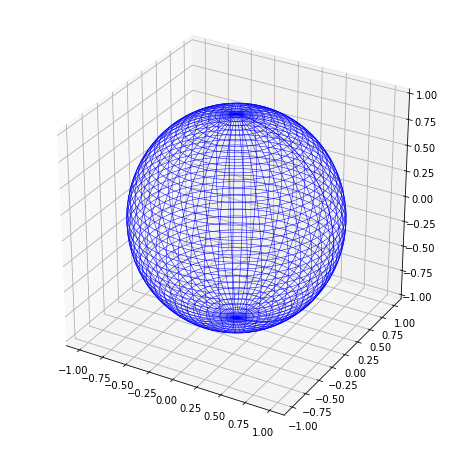

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from spherical_geometry import polygon
from spherical_geometry import vector

#Get a grid uniformly distributed in phi and theta as below using meshgrid. Change '100' to get a denser grid 

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

#Convert into Cartesian coords to plot in 3d

x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)       

#Plot the figure using figaspect to get a unifrom sphere. Color can be changed with color parameter.

fig = plt.figure(figsize=plt.figaspect(1.)*2)
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color="b",linewidth=0.5)

## Problem 2: Moving a single free particle on a sphere

View the jupyter file titled 'Frame Fields' for explanation of a frame field. Tldr: Free particles move in straight lines on the plane; they move in great circle arcs on a sphere. The quantity analogous to velocity on a sphere is the angular velocity. Therefore initial condition is ($\phi$,$\theta$,$\vec{\omega}$)

### The Code

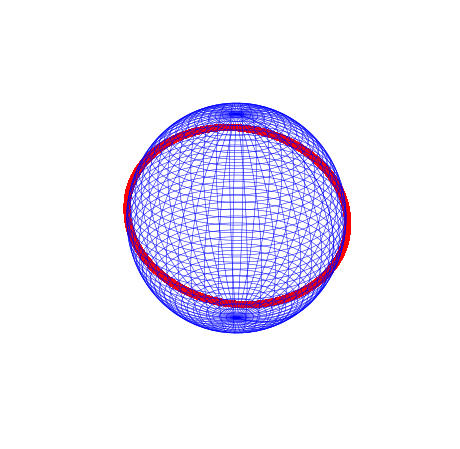

In [11]:

def gen_normal_vel(r):#Gets frame field
    n=np.random.random(3)
    n=n-np.dot(n,r)*r
    m=np.linalg.norm(n)
    n=n/m
    b=np.cross(r,n)
    return np.array([r,n,b])
def gen_path_from_frame(F,w,ang,dt):#Gets path of particle
    ang=ang+w*dt #angle at t
    vec=np.array([np.cos(ang),np.sin(ang),0]) #Velocity tangent vector at time t on XY plane
    vec=np.dot(F,vec) #Matrix multiply to get new vector
    return vec,ang

w=1
N=8000
ang=0
dt=0.01

r=np.random.random(3)
r=r/np.linalg.norm(r)
F=gen_normal_vel(r)
X=[r[0]*1.01]
Y=[r[1]*1.01]
Z=[r[2]*1.01]

for i in range(N):# N points of path
    r,ang=gen_path_from_frame(F,w,ang,dt)
    X.append(r[0]*1.01)
    Y.append(r[1]*1.01)
    Z.append(r[2]*1.01)
  
    
    


# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.)*2)
ax = fig.add_subplot(111, projection='3d')

ax.plot(X[1:],Y[1:],Z[1:],'ro',linewidth=0.1)
ax.plot_wireframe(x, y, z, color="b",linewidth=0.5)
#Turn off the axis planes
ax.set_axis_off()



plt.show()


## Problem 3: Moving multiple points on sphere

The problem is trivial given Problem 2 solution.

## Problem 4: Creating a circle on sphere (using Classes)

Classes are an essential Object Oriented Programming toolset in Python primarily inherited from older languages like C++. Generally speaking a class has attributes and methods. Attributes are data and methods are functions. An important type of methods are constructors. A constructor is used to initialise an instance of the class. Example: if humans were a class, attributes might include height, weight, sex, gender identity, etc. Its functions might include walk(), eat(), shit(), pee(), etc. The constructor would be something that gives the initial attributes of the human. We illustrate this with an example of a class named Square.

In [14]:
class Square: #Note the class syntax here. Its class classname:
    def __init__(self,a):#All class functions usually have self as the first argument. __init__ is the constructor in general
        self.length=a #here length is the attribute. self.attribute=value tells us that the class has attribute length with value a
    def ret_area(self): #This is a method to return area. Note how attributes are used. use self.length not length.
        print (self.length**2)

Sq1=Square(1) #Here we create an instance/object of the class Square. The object is Sq1. Two more objects are given. 
Sq2=Square(2)
Sq3=Square(3)
#We can call methods of an object in the following manner
Sq1.ret_area()
Sq2.ret_area()
Sq3.ret_area()

1
4
9


### The Code

In [28]:
class disk: #Our class name is disk
    def __init__(self,b,c,w):#Our initial attributes to constructor are radius(float), position vector as centre(numpy array), binormal vector(numpy array)
        self.radius=b
        self.centre=c
        self.binormal=w
    def disk_polygon(self):#The method returns a SingleSphericalPolygon object representing our circle
        C=polygon.SingleSphericalPolygon.from_cone(vector.vector_to_lonlat(self.centre[0],self.centre[1],self.centre[2])[0],vector.vector_to_lonlat(self.centre[0],self.centre[1],self.centre[2])[1],self.radius,degrees=False)
        return C
    def ret_area(self):#Returns area of our circle polygon
        return self.disk_polygon().area()
    def ret_data(self):#This method allows us to read the attributes of our object
        return self.radius, self.centre, self.binormal
    def ret_frame(self):#Returns the frame field of our object i.e. disc particle
        return [self.centre,  np.cross(self.binormal/np.linalg.norm(self.binormal),self.centre),self.binormal/np.linalg.norm(self.binormal)]
    def ret_vel(self):#Returns the tangential velocity on sphere
        return np.cross(self.binormal,self.centre)
    def add_drawing(self,ax,M):#Plots the disk object given a matplotlib Axes3d object ax and no. of points to construct circle N
        F=self.ret_frame()#Get frame field
        C=[]#Array to hold points that make up the boundary of the circle plot
        for i in range(M+1):#No. of points making up boundary
            vec=self.centre+self.radius*F[1]*np.cos(2*i*np.pi/N)+self.radius*F[2]*np.sin(2*i*np.pi/N) #Work out the geometric meaning of this :0
            vec=vec/np.linalg.norm(vec) #Normalize to fall on sphere. In prev line we pass tan(radius) and not radius. Why??
            C.append(vec*1.01)#Slightly raise vector to be visible above spherical grid
        B= np.array(C).transpose()#Transpose data for ease of use            
        ax.plot(B[0],B[1],B[2],c='red',linewidth=1)#Plot the circle
        return 0 #Dummy return statement

In [29]:
#The above code is the class definition. Below is an implementation that creates 10 disk() objects and uses the add_drawing
#method to plot 10 circles randomly of the same radius on the grid.

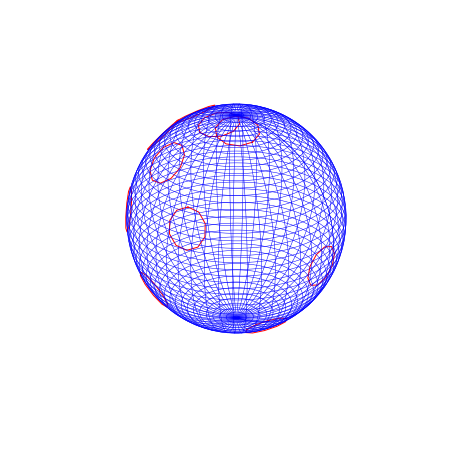

In [41]:
fig = plt.figure(figsize=plt.figaspect(1.)*2) 
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color="b",linewidth=0.5) #Get the sphere grid
for i in range(10): #Plot 10 circles
    c=np.random.random(3)-np.array([0.5,0.5,0.5]) #Get random position vector to be used as self.centre
    c=c/np.linalg.norm(c) #standard way to normalize vectors.
    n=np.random.random(3)-np.array([0.5,0.5,0.5]) #Get random binormal to be used as self.binormal
    n=n-c*np.dot(n,c)# Ensure binormal is perpendicular by using Gram Schmidt decomposition
    n=n/np.linalg.norm(n) #Normalize binormal
    D=disk(0.2,c,n) #Create a disk object with spherical radius 0.2
    D.add_drawing(ax,10) #Plot the disk object on grid
#Turn off the axis planes
ax.set_axis_off()
#Running in spyder can help you rotate sphere to see result better. Obviously, some overlap.

## Problem 5-6: Moving Growing Circles on a Sphere (in progress, to be continued)

Things are heating up! To move circles on a sphere without collisions, etc, we need to update the disc() objects attribute centre. We need to write a new function for this. Here we are writing a class method outside the class definition. This is super sketchy and is done only in this jupyter for clarity's sake.

In [45]:
def func(self,r,c,w): #Similar to constructor, updates any attributes 
    self.radius=r
    self.centre=c
    self.binormal=w
disk.update_attr=func #Tells python to put this in class definition as a new method update_attr()

In [46]:
#Testing new method
D=disk(0.2,np.array([0,0,1]),np.array([1,0,0]))
D.ret_data()

(0.2, array([0, 0, 1]), array([1, 0, 0]))

In [48]:
D.update_attr(0.3,np.array([1,0,0]),np.array([0,-1,0]))
D.ret_data()

(0.3, array([1, 0, 0]), array([ 0, -1,  0]))

In [49]:
#Clearly, it works

Now we attempt to define a class called Ensemble which holds our entire simulation together. It contains as attributes time t, and a list of disk objects

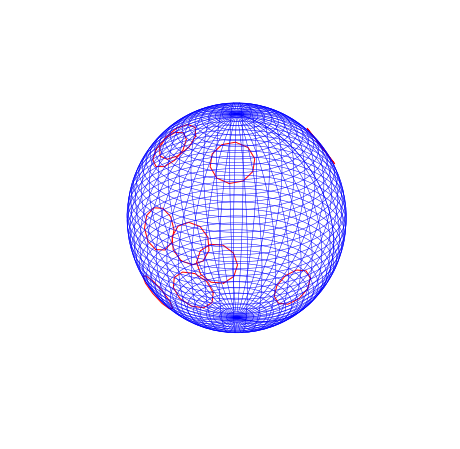

In [52]:
class Ensemble:#Our mega-class name is Ensemble
    def __init__(self,N,b):#Attributes are N=no. of disks on sphere, b=initial radius of each disk
        self.N=N
        self.b=b
        self.Disk_Arr=[]
        for i in range(N):
            c=np.random.random(3)-np.array([0.5,0.5,0.5]) #Get random position vector to be used as self.centre
            c=c/np.linalg.norm(c) #standard way to normalize vectors.
            n=np.random.random(3)-np.array([0.5,0.5,0.5]) #Get random binormal to be used as self.binormal
            n=n-c*np.dot(n,c)# Ensure binormal is perpendicular by using Gram Schmidt decomposition
            n=n/np.linalg.norm(n) #Normalize binormal
            D=disk(b,c,n) #Create a disk object with initial spherical radius b
            self.Disk_Arr.append(D) #Make a disc list
        self.t=0 #initial time=0
    def draw_ensemble(self,ax):#draws ensemble on Axes3D object ax
        for i in range(self.N):
            self.Disk_Arr[i].add_drawing(ax,10)
#Check we can still draw 10 circles as before below:
fig = plt.figure(figsize=plt.figaspect(1.)*2) 
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color="b",linewidth=0.5) #Get the sphere grid
#Turn off the axis planes
E=Ensemble(10,0.2)
E.draw_ensemble(ax)
ax.set_axis_off()
#Running in spyder can help you rotate sphere to see result better. Obviously, some overlap.
        
        
            
            
        

Hopefully, you can see the power of using classes. I understand some of you may not understand classes. However if you have any interest at all in a career relying on programming, mastery of classes is crucial. If not, you can get by by simply understanding what the code does without knowing classes. This is my contribution this week. Byee